<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# Градієнтний бустінг

## План


1. [З чого складається помилка моделі](#1.-З-чого-складається-помилка-моделі)
2. [Ансамблеві методи: мотивація та класичні підходи](#2.-Ансамблеві-методи:-мотивація-та-класичні-підходи)
3. [Бустінг. Загальна схема](#3.-Бустінг.-Загальна-схема)
4. [Алгоритм AdaBoost](#4.-Алгоритм-AdaBoost)
5. [Градієнтний бустінг](#5.-Градієнтний-бустінг)
6. [XGBoost](#6.-XGBoost)
7. [Приклади використання](#7.-Приклади-використання)
8. [Порівняння XGBoost і градієнтного бустінга Scikit-Learn](#8.-Порівняння-XGBoost-і-градієнтного-бустінга-Scikit-Learn)
9. [Корисні ресурси](#9.-Корисні-ресурси)

## 1. З чого складається помилка моделі


Очікувана квадратична помилка прогнозу в конкретній точці $\textbf{x}$, для моделі виду $y = f\left(\textbf{x}\right) + \epsilon$, розкладається на складові:

$$\begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \underbrace{\left(f(\textbf{x}) - \mathbb{E}\left[\widehat{f}(\textbf{x})\right]\right)^2}_{\text{Квадрат зсуву (Bias}^2\text{)}} + \underbrace{\text{Var}\left[\widehat{f}(\textbf{x})\right]}_{\text{Розкид (Variance)}}  
+ \underbrace{\sigma^2}_{\text{Неусувна помилка}}
\end{array}$$

- **Квадрат зсуву (Bias²)**: систематична помилка: наскільки в середньому модель відхиляється від істинної функції.
- **Розкид (Variance)**: варіативність результатів при навчанні на різних вибірках (дисперсія).
- **Неусувна помилка (Irreducible error)** — випадковий шум у даних, який не можна зменшити.

Якщо з останнім доданком ми нічого зробити не можемо, то на перші два ми можемо якось впливати.

В ідеалі, звичайно ж, хотілося б мінімізувати і зсув, і розкид (лівий верхній квадрат рисунку), але на практиці часто доводиться балансувати між зсувом і нестабільними оцінками (висока дисперсія).
<center>
<img src="../img/bvtf.png" width="600">
</center>

Як правило, при збільшенні складності моделі (наприклад, при збільшенні кількості вільних параметрів) збільшується дисперсія (розкид) оцінки, але зменшується зсув. Через те, що навчальний набір даних повністю запам'ятовується замість узагальнення, невеликі зміни призводять до несподіваних результатів (перенавчання). Якщо ж модель слабка, то вона не в змозі вивчити закономірність, в результаті вивчається щось інше, зміщене щодо правильного рішення.

Вплив зміни складності моделі на зсув та розкид
<center>
<img src="../img/tradeoff.png" width=60%>
</center>

## 2. Ансамблеві методи: мотивація та класичні підходи

**Ключова ідея:**

Одна модель рідко забезпечує одночасно низький зсув і низький розкид. Ансамблі дозволяють компенсувати це, об’єднуючи кілька простих (слабких) моделей.

### Класичний підхід: 

**Беггінг (bootstrap aggregating):**

- Створює кілька моделей на різних випадкових підвибірках.

- Зменшує розкид (variance), але не знижує зсув.

**Випадковий ліс:**

- Беггінг дерев рішень + випадковий вибір ознак.

- Потужний і простий ансамблевий метод.

<center>
<img src='../img/bagging01.png' width=100%>
</center> 

**Проблема:**

- Якщо всі базові моделі (алгоритми) мають високий зсув, то беггінг не допоможе — їх середнє теж буде неправильним.

- Беггінг **не "вчиться" на помилках**.

**Рішення:**

- Потрібна стратегія, яка **послідовно вдосконалює модель**.

- Кожен новий алгоритм **враховує помилки попередніх**.

- Так з’являється **бустінг** — наступний крок в ансамблевих методах.

## 3. Бустінг. Загальна схема

**Бустінг** є жадібним алгоритмом побудови композиції алгоритмів. Основна ідея полягає в тому, щоб, маючи сукупність відносно слабких алгоритмів навчання, побудувати їх хорошу лінійну комбінацію. Він схожий на беггінг тим, що базовий алгоритм навчання є фіксованим. Відмінність полягає в тому, що навчання базових алгоритмів для композиції відбувається ітеративно, і кожен наступний алгоритм прагне компенсувати недоліки композиції всіх попередніх алгоритмів.

<center>
<img src='../img/boosting01.png' width=80%>
</center> 

На прикладі бустінга стало зрозуміло, що хорошою якістю можуть володіти як завгодно складні композиції класифікаторів, за умови, що вони правильно налаштовуються. Це розвіяло уявлення, яке існувало довгий час, про те, що для підвищення узагальнюючої здатності необхідно обмежувати складність алгоритмів.

Згодом цей феномен бустінга отримав теоретичне обгрунтування. Виявилося, що зважене голосування не збільшує ефективну складність алгоритму, а лише згладжує відповіді базових алгоритмів. Ефективність бустінга пояснюється тим, що в міру додавання базових алгоритмів збільшуються відступи навчальних об'єктів. Причому бустінг продовжує розсувати класи навіть після досягнення безпомилкової класифікації навчальної вибірки.

Загальна схема бустінга:
- Шуканий ансамбль алгоритмів має вигляд 
$$
a(x) = {\rm sign}\left(\sum\limits_{t=1}^T \alpha_t b_t(x)\right),
$$
де $b_t$ – базові алгоритми.

- Ансамбль будується ітеративно, оптимізуючи на кожному кроці функціонал $Q_t$, що дорівнює кількості помилок поточної композиції на навчальній вибірці.
- При додаванні доданка $\alpha_t b_t(x)$ в суму, функціонал $Q_t$ оптимізується тільки по базовому алгоритму $b_t(x)$ та коефіцієнту $\alpha_t$; усі попередні складові вважаються фіксованими.
- Функціонал $Q_t$ є сумою по об'єктах навчальної вибірки порогових функцій: 
$$
Q_t=\sum\limits_{i=1}^{\ell}\left[y_i \sum\limits_{j=1}^t \alpha_j b_j(x_i) < 0\right],
$$
які відображають помилки поточної композиції. Кожен такий доданок має вигляд "сходинки" і є розривною функцією.

Для спрощення розв'язання задачі оптимізації така порогова функція замінюється на неперервно диференційовну оцінку зверху. В результаті отримується новий функціонал $\hat{Q}_t \geqslant Q_t$, мінімізація якого призводить до мінімізації вихідного функціоналу $Q_t$.

Використовуючи різні апроксимації для порогової функції втрат $[z < 0]$, будемо отримувати різні види бустінга:
- $e^{-z}$ – AdaBoost;
- $\log_2(1 + e^{-z})$ – LogitBoost;
- $(1 - z)^2$ – GentleBoost;
- $e^{-cz(z+a)}$ – BrownBoost;
- інші.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')

#!pip install xgboost
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris, load_digits, fetch_california_housing

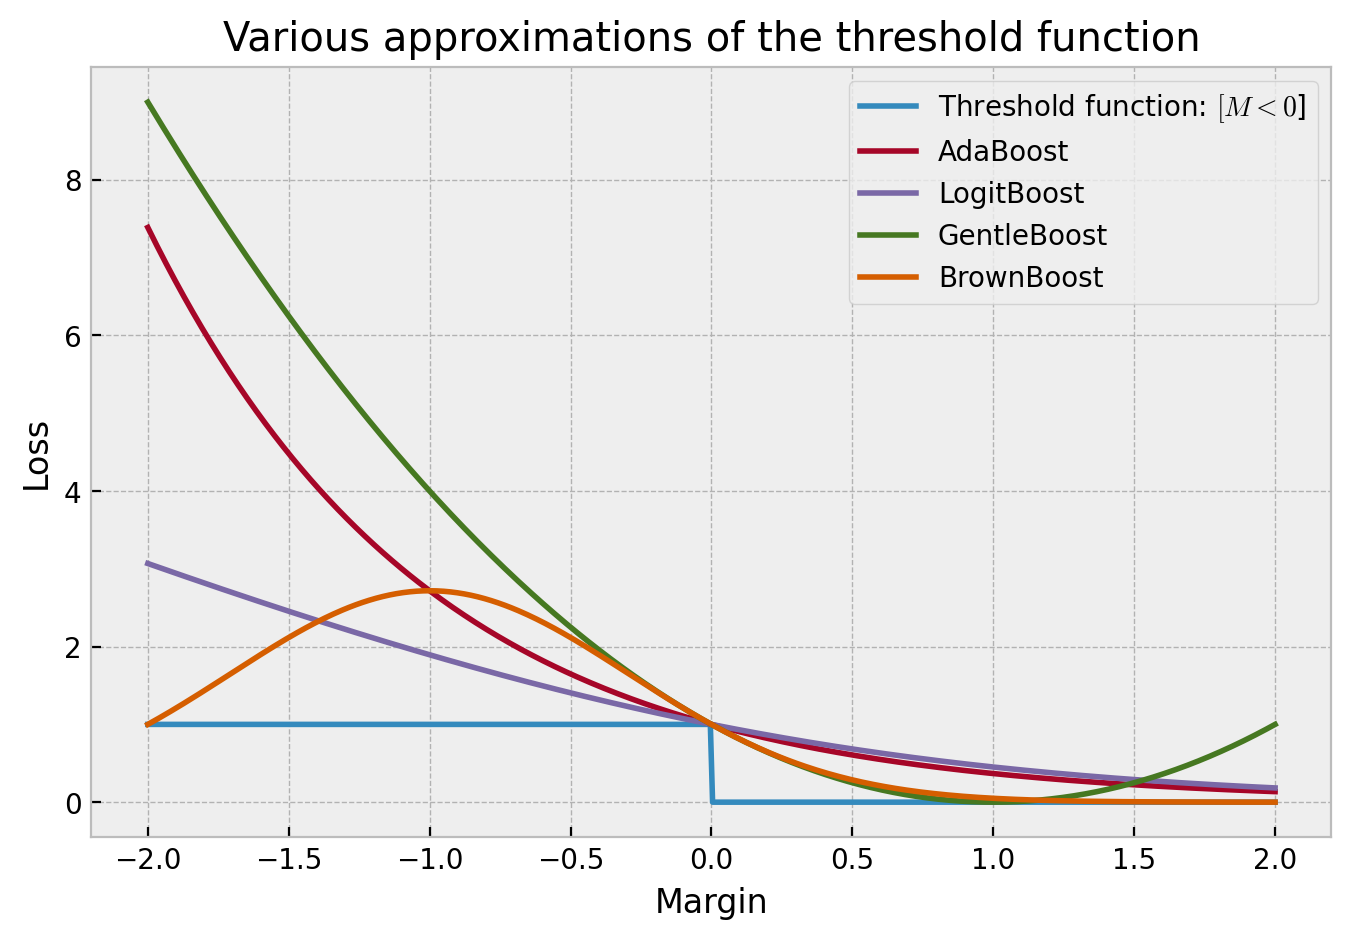

In [2]:
x = np.linspace(-2, 2, 500)

plt.figure(figsize=(8,5))
plt.plot(x, x < 0, lw=2, label='Threshold function: $[M < 0$]')
plt.plot(x, np.exp(-x), lw=2, label='AdaBoost')
plt.plot(x, np.log2(1 + np.exp(-x)), lw=2, label='LogitBoost')
plt.plot(x, (1 - x) ** 2, lw=2, label='GentleBoost')
plt.plot(x, np.exp(-x * (x + 2)), lw=2, label='BrownBoost')
plt.title('Various approximations of the threshold function')
plt.legend(loc='best')
plt.xlabel('Margin')
plt.ylabel('Loss');

## 4. Алгоритм AdaBoost

Якщо в якості гладкої апроксимації порогової функції використати $e^{-z}$, отримаємо алгоритм AdaBoost. У цьому випадку функціонал має вигляд:
$$
\hat{Q}_t=\sum\limits_{i=1}^{\ell}\exp\left(-y_i \sum\limits_{j=1}^t \alpha_j b_j(x_i)\right),
$$
а оптимізація на $t$-му кроці полягає в мінімізації цього функціоналу лише за $b_t$ та $\alpha_t$. Це призводить до простої реалізації через оновлення ваг об’єктів навчальної вибірки та ваг базових алгоритмів.

Сам алгоритм виглядає наступним чином:


- Ініціалізуємо ваги об'єктів: $\displaystyle w_i^{(0)} = \frac{1}{\ell},\quad i = 1, \dots, \ell$.
- Для всіх $t = 1, \dots, T$
    * Навчаємо базовий алгоритм $b_t$.
    * Обчислюємо зважену помилку базового алгоритму $\epsilon_t = \displaystyle\sum\limits_{i=1}^\ell w_i^{(t-1)}[y_i \neq b_t(x_i)]$ на навчальній вибірці.
    * Обчислюємо коефіцієнт: $\displaystyle \alpha_t = \frac{1}{2}ln\frac{1 - \epsilon_t}{\epsilon_t}$.
    * Оновлюємо ваги об'єктів: $w_i^{(t)} = w_i^{(t-1)} \exp\left(-\alpha_t y_i b_t(x_i)\right),\quad i = 1, \dots, \ell$.
    * Проводимо нормалізацію ваг: $\displaystyle w_0^{(t)} = \sum\limits_{j = 1}^{\ell} w_j^{(t)}, w_i^{(t)} = \frac{w_i^{(t)}}{w_0^{(t)}},\quad i = 1, \dots, \ell$.

- Повертаємо композицію:
    
    Остаточна композиція має вигляд:
    $$
    a(x) = {\rm sign}\left(\sum\limits_{t=1}^T \alpha_t b_t(x)\right)
    $$

Алгоритм, що додається, навчається шляхом мінімізації зваженої частоти помилок на навчальній вибірці, а не стандартного функціоналу, рівного частоті помилок. 

Якщо $b_t(x_i) \neq y_i$, то вага $w_i$ збільшується в $e^{\alpha_t}$ разів.

Якщо $b_t(x_i) = y_i$, то вага $w_i$ зменшується в $e^{\alpha_t}$ разів.

На наступних ітераціях алгоритм зосереджується на важко класифікованих об'єктах.

### Приклад для ілюстрації

Нехай базові алгоритми – всього лише "пеньки", тобто дерева рішень глибини 1.

<center>
<img src='../img/adaboost_toy_step1.png' width=60%>
<img src='../img/adaboost_toy_step2.png' width=40%>
</center>    

Ваги об'єктів, на яких базовий алгоритм помиляється, збільшуються (кружки збільшуються в розмірі).

В кінці базові алгоритми "голосують", їх ваги $\alpha_t$ визначалися в процесі побудови.
<center>
<img src='../img/adaboost_toy_step3.png' width=60%>
</center>

<img src="../img/boosting_overfitting.png" width=80%>

Спочатку було виявлено відсутність перенавчання бустінга аж до 1000 базових класифікаторів, пізніше це було теоретично обгрунтовано.

## 5. Градієнтний бустінг

**Метод градієнтного бустінга** в деякому сенсі є узагальненням інших методів бустінга, оскільки він дозволяє оптимізувати довільну диференційовну функцію втрат. Даний алгоритм схожий на метод градієнтного спуску, що застосовується для розв'язання задач оптимізації. Основна ідея полягає в тому, що кожен наступний алгоритм, який додається в композицію налаштовується на залишки попередніх алгоритмів.

Нехай задана диференційовна функція втрат $L(F(x), y)$. Сам алгоритм виглядає наступним чином:

- Ініціалізуємо композицію константним значенням:
    $$\displaystyle F_0(x) = \arg\min\limits_{\gamma}\sum\limits_{i=1}^{\ell} L(\gamma, y_i).$$

- Для всіх $t = 1, \dots, T$:
    * Обчислюємо антиградієнт функції втрат попередньої композиції (залишки): 
    $$
    \displaystyle r_{it} = -\left[\frac{\partial L\left(F(x_i), y_i\right)}{\partial{F(x_i)}}\right]_{F(x) = F_{t-1}(x)},\quad i = 1, \dots, \ell.
    $$
    * Навчаємо базовий алгоритм $b_t(x)$ на отриманих залишках, тобто на вибірці $\{(x_i, r_{it}), i = 1, \dots, \ell\}$.
    * Обчислюємо коефіцієнт $\alpha_t$ перед базовим алгоритмом $b_t(x)$ як розв'язок наступної одновимірної задачі оптимізації:
    $$\displaystyle \alpha_t = \arg\min\limits_\alpha \sum\limits_{i=1}^{\ell} L(F_{t-1}(x_i) + \alpha b_t(x_i), y_i).$$
    * Оновлюємо композицію: 
    $$F_t(x) = F_{t-1}(x) + \alpha_t b_t(x).$$

Однією з можливих модифікацій даного алгоритму є стохастичний градієнтний бустінг (SGB), який полягає в тому, щоб обчислювати суми виду $\sum\limits_{i=1}^{\ell}$ не по всій навчальній вибірці, а тільки по деякій її випадковій підвибірці. Такий підхід є одним із способів регуляризації даного алгоритму і дозволяє поліпшити якість композиції, збіжність алгоритму і час навчання.

Інший спосіб регуляризації – це введення параметра $\gamma$, так званого темпу (швидкості) навчання. При додаванні нового доданка в композицію, будемо додавати його, помноженого на цей коефіцієнт. Як правило, чим менша швидкість навчання, тим краща якість кінцевої композиції.

Для задач регресії переважно використовують квадратичну функцію втрат $L(x, y) = (x - y)^2$ або модуль відхилення $L(x, y) = |x - y|$.

У задачі класифікації використовується логістична функція втрат, яка дозволяє повертати ймовірності приналежності об'єктів до класів.

Одним з найбільш популярних сімейств базових алгоритмів є дерева рішень. Саме такий варіант градієнтного бустінга <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">реалізовано</a> в Scikit-Learn.

## 6. XGBoost

**XGBoost** – поліпшення звичайного алгоритму градієнтного бустінга на деревах рішень через системну оптимізацію та удосконалення алгоритму.

Проблема багатьох алгоритмів побудови дерев в тому, що в них не приділяється належної уваги регуляризації.
У класичному градієнтному бустінгу застосовуються такі міри:
- обмеження на структуру дерева: максимальна глибина (`max_depth`), мінімальна кількість об'єктів в листку (`min_samples_leaf`);
- контроль швидкості навчання (`learning_rate`);
- збільшення "несхожості" дерев за рахунок рандомізації, як у випадковому лісі.

[XGBoost](https://github.com/dmlc/xgboost) використовує ще більше параметрів для регуляризації базових дерев.

Цільова функція для оптимізації в XGBoost складається з двох складових: специфічною функції втрат і регуляризатора $\Omega (f_k)$ для кожного з $K$ дерев, де $f_k$ – прогноз $k$-ого дерева.


$$
{\rm obj}(\theta) = \sum_{i=1}^{\ell} l(y_i,\hat{y_i}) +  \sum_{k=1}^{K} \Omega (f_k)
$$

Функція втрат залежить від розв'язуваної задачі (XGBoost адаптований під задачі класифікації, регресії і ранжування (детальніше добре описано в [документації](http://xgboost.readthedocs.io/) XGBoost), а регуляризатор виглядає наступним чином:
$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2
$$

Перший доданок $\left( \gamma T \right)$ штрафує модель за велику кількість листків $T$, а другий $\left( \displaystyle\frac{1}{2} \lambda \sum\limits_{j=1}^{T}w_j^2 \right)$ контролює суму ваг моделі в листках.

## 7. Приклади використання

У Scikit-Learn доступні алгоритми AdaBoost і GradientBoosting для задач класифікації і регресії.

Розглянемо приклад побудови моделі одновимірної регресії з використанням <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html">`GradientBoostingRegressor`</a>.

In [3]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) +\
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

In [4]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)
d_predict = dtree.predict(X_test)

gbtree = GradientBoostingRegressor(n_estimators=100, subsample=0.5,
                                  random_state=42)  
gbtree.fit(X_train, y_train)
gb_predict = gbtree.predict(X_test)

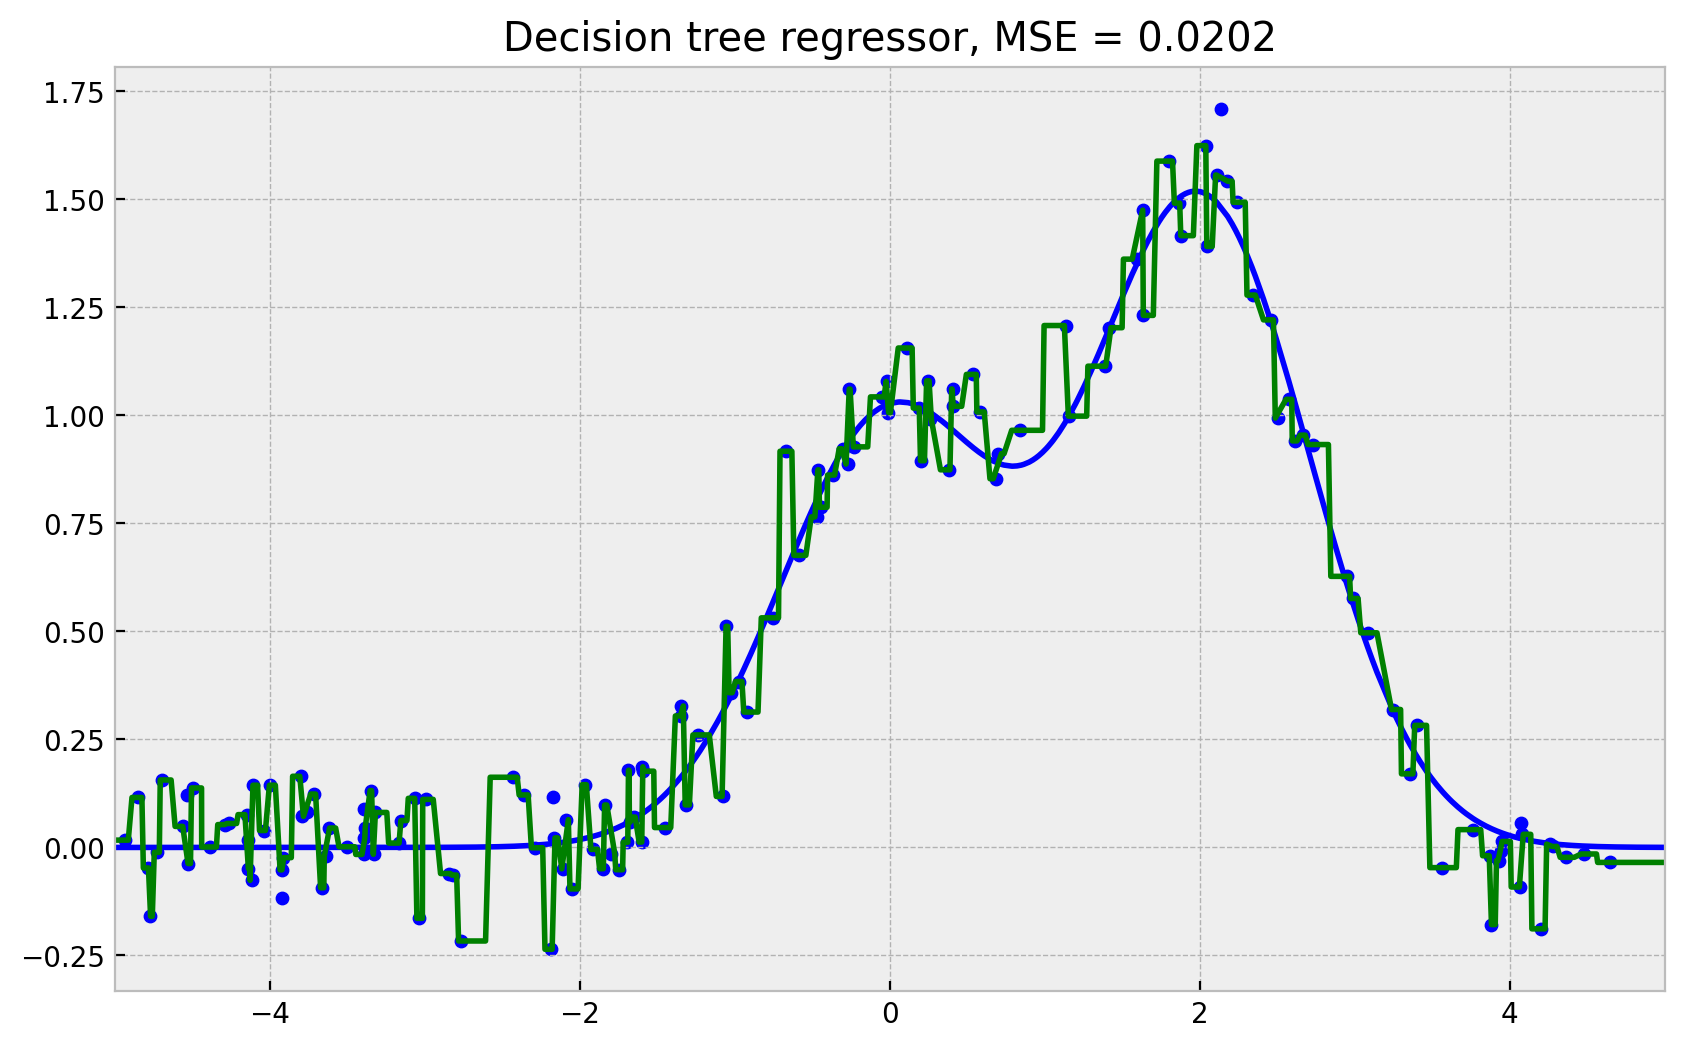

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.4f" % 
          np.mean((y_test - d_predict) ** 2));

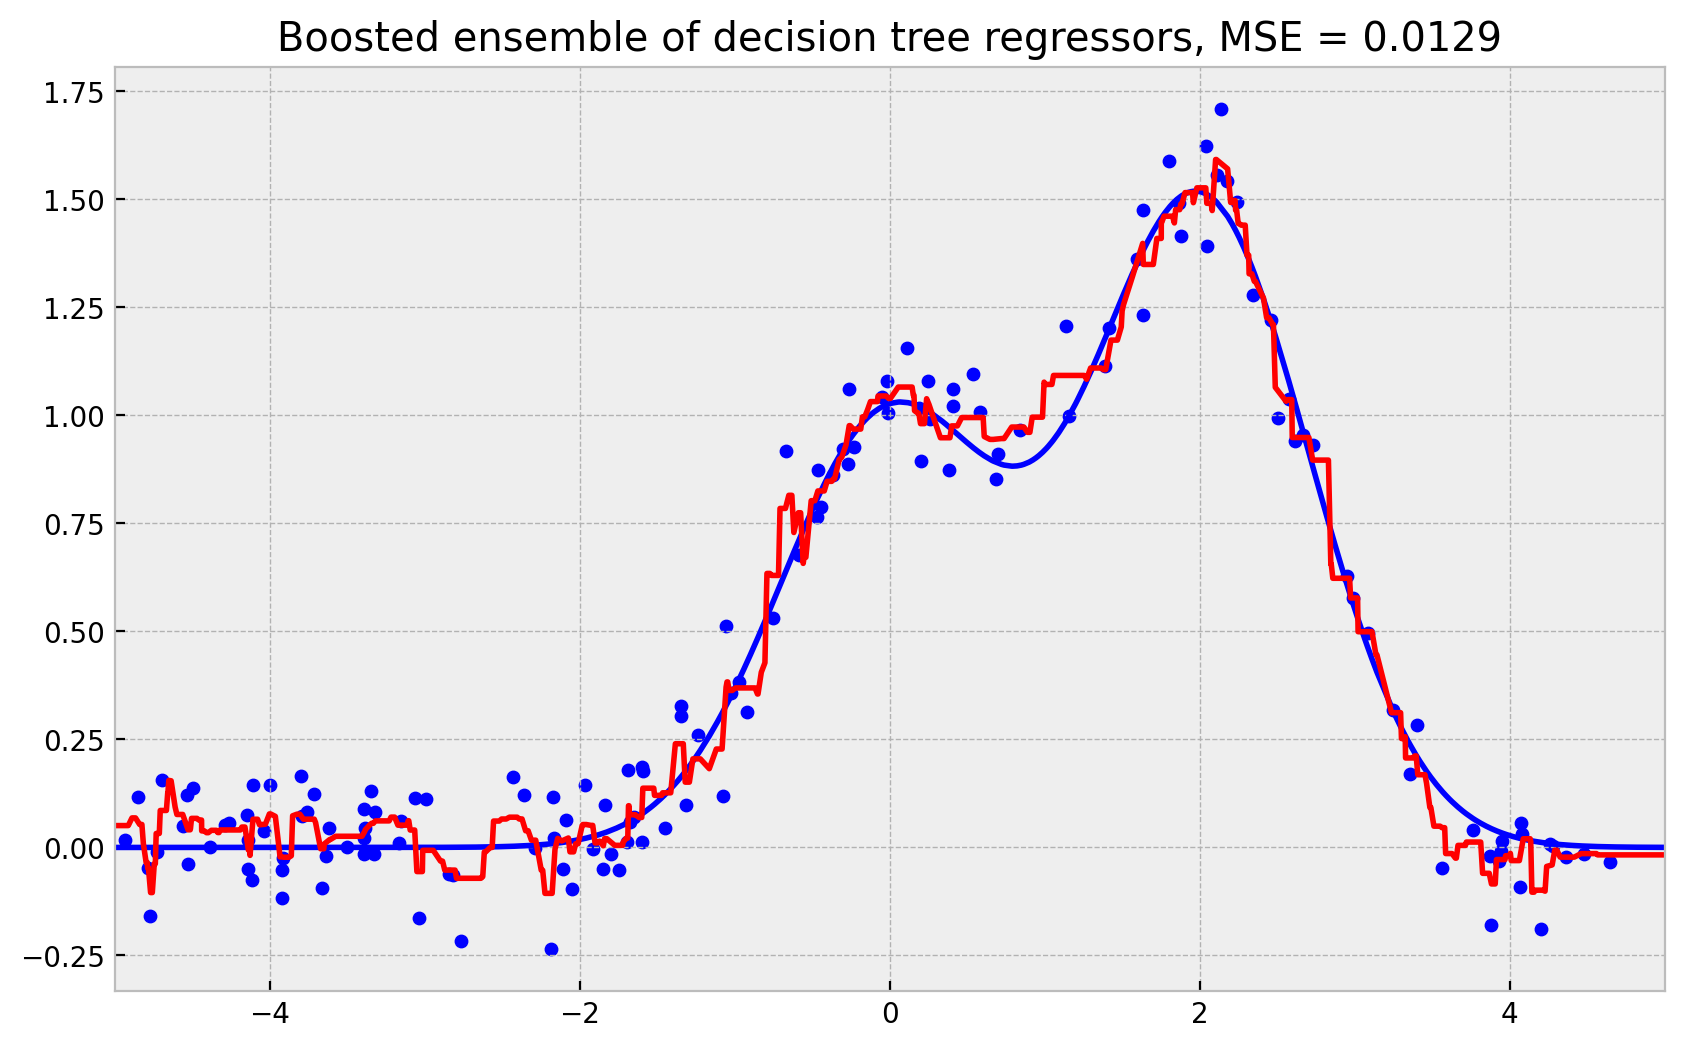

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, gb_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Boosted ensemble of decision tree regressors, MSE = %.4f" % 
          np.mean((y_test - gb_predict) ** 2));

Розглянемо приклад використання `AdaBoostClassifier` з деревами рішень одиничної глибини (decision stumps) як базових алгоритмів для розв'язання задачі класифікації.

In [7]:
data = pd.read_csv('../data/diabetes.csv', sep=',')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :8], 
                                                    data.iloc[:, 8], 
                                                    random_state=0)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# AdaBoost
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         random_state=42)
ada.fit(X_train, y_train)

print("Decision tree accuracy: %.f" % dt.score(X_test, y_test))
print("AdaBoost accuracy: %.2f" % ada.score(X_test, y_test))

Decision tree accuracy: 1
AdaBoost accuracy: 0.79


### Приклад класифікації за допомогою XGBoost на даних Iris

In [9]:
iris = load_iris()
X = iris['data']
y = iris['target']

kf = KFold(n_splits=5, shuffle=True, random_state=13)

for train_index, test_index in kf.split(y):
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
[[9 0 0]
 [0 9 1]
 [0 2 9]]
[[12  0  0]
 [ 0  9  2]
 [ 0  0  7]]
[[10  0  0]
 [ 1 10  0]
 [ 0  0  9]]


### Приклад побудови регресійної моделі за допомогою XGBoost на основі даних California Housing

In [10]:
california = fetch_california_housing()

X = california['data']
y = california['target']

kf = KFold(n_splits=5, shuffle=True, random_state=17)

for train_index, test_index in kf.split(y):
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

0.2373408495007355
0.22253519706548303
0.22606713407809423
0.21384729615337678
0.21096250520256224


### Приклад підбору параметрів з GridSearchCV

In [11]:
X = california['data']
y = california['target']

xgb_model = xgb.XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, 
                        {'max_depth': [2,4,6]}, verbose=1)
xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.6867214702651334
{'max_depth': 4}


Для того, щоб зупинити навчання моделі (градієнтний спуск), якщо помилка за декілька ітерацій не зменшилася використовується "рання зупинка".

In [12]:
digits = load_digits()
X = digits['data']
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

clf = xgb.XGBClassifier(early_stopping_rounds=10, eval_metric="merror")

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)], 
    verbose=True
);

[0]	validation_0-merror:0.14222
[1]	validation_0-merror:0.10889
[2]	validation_0-merror:0.08000
[3]	validation_0-merror:0.07778
[4]	validation_0-merror:0.06667
[5]	validation_0-merror:0.06444
[6]	validation_0-merror:0.06889
[7]	validation_0-merror:0.07333
[8]	validation_0-merror:0.06889
[9]	validation_0-merror:0.06667
[10]	validation_0-merror:0.06667
[11]	validation_0-merror:0.06889
[12]	validation_0-merror:0.06889
[13]	validation_0-merror:0.06222
[14]	validation_0-merror:0.05778
[15]	validation_0-merror:0.06222
[16]	validation_0-merror:0.06000
[17]	validation_0-merror:0.06000
[18]	validation_0-merror:0.05778
[19]	validation_0-merror:0.05556
[20]	validation_0-merror:0.05556
[21]	validation_0-merror:0.05556
[22]	validation_0-merror:0.05333
[23]	validation_0-merror:0.05333
[24]	validation_0-merror:0.05111
[25]	validation_0-merror:0.05333
[26]	validation_0-merror:0.05111
[27]	validation_0-merror:0.04889
[28]	validation_0-merror:0.05111
[29]	validation_0-merror:0.04889
[30]	validation_0-me

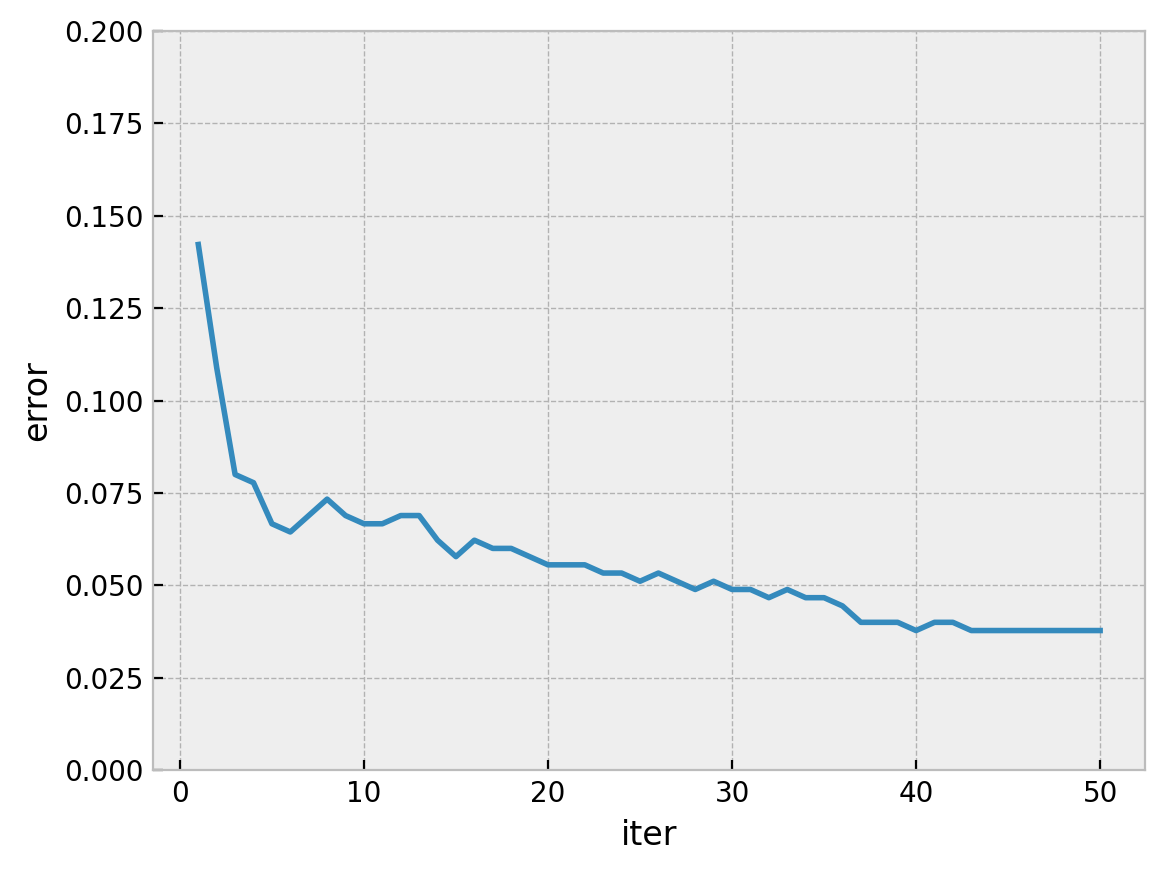

In [13]:
errors_by_iter = clf.evals_result()['validation_0']['merror']

plt.plot(range(1, len(errors_by_iter) + 1), errors_by_iter)
plt.xlabel('iter');
plt.ylabel('error');
plt.ylim(0, 0.2);

## 8. Порівняння XGBoost і градієнтного бустінга Scikit-Learn

### Основні параметри

### XGBoost

Виділяють три групи параметрів:
- Загальні параметри, що відповідають за базовий алгоритм для бустінга і розпаралелювання.
- Параметри обраного базового алгоритму.
- Параметри навчання, що відповідають за функцію втрат і метрику якості на валідації.

**1. Загальні параметри:**
- `booster` [default=gbtree] – тип базового алгоритму для бустінга: дерево рішень gbtree або лінійна модель gblinear.
- `verbosity` [default=1] – повідомлення в процесі роботи алгоритму. Допустимі значення: 0 (silent), 1 (warning), 2 (info), 3 (debug).
- `nthread` [default to maximum number of threads available if not set] – кількість потоків доступних для паралельної роботи xgboost.

**2. Параметри базового алгоритму:**

**2.1. Дерево рішень:**
- `eta` [default=0.3] – швидкість (темп) навчання, перед додаванням дерева в композицію воно множиться на eta. Використовується для запобіганню перенавчання за рахунок "скорочення" ваг базових алгоритмів, роблячи модель більш консервативною. Чим менше eta, тим більше потрібно ітерацій `num_boost_round` для навчання моделі з хорошою якістю. Діапазон: [0, 1]
- `gamma` [default=0] – мінімальне зниження значення функції втрат, необхідне для подальшого розбиття вершини дерева. Більші значення gamma > 0 призводять до більш консервативних моделей. Діапазон: [0, $\infty$).

- `max_depth` [default=6] – максимальна глибина дерева. Діапазон: [1, $\infty$).
- `min_child_weight` [default=1] – мінімальна необхідна (зважена) кількість прикладів в кожній вершині. Чим більша, тим більш консервативна кінцева модель. Діапазон: [0, $\infty$).
- `max_delta_step` [default=0] – зазвичай дорівнює нулю. Додатні значення використовуються при незбалансованих класах для прискорення збіжності. Діапазон [0, $\infty$).

- `subsample` [default=1] – частка вибірки, яка використовується для навчання кожного дерева. Якщо subsample < 1, то вибирається випадкова підвибірка, що допомагає в боротьбі з перенавчанням. Діапазон: (0, 1]
- `colsample_bytree` [default=1] – частка ознак, яка використовується для навчання кожного дерева. Діапазон: (0, 1]
- `lambda` [default=1] – коефіцієнт перед $L_2$-регуляризатором в функції втрат.
- `alpha` [default=0] – коефіцієнт перед $L_1$-регуляризатором в функції втрат.

**2.2. Лінійна модель:**
- `lambda` [default=0] – коефіцієнт перед $L_2$-регуляризатором вектора ваг в функції втрат.
- `alpha` [default=0] – коефіцієнт перед $L_1$-регуляризатором вектора ваг в функції втрат.
- `lambda_bias` [default=0] – коефіцієнт перед $L_2$-регуляризатором зсуву (вільного члена) в функції втрат.

**3. Параметри задачі навчання:**
- `objective` [default=reg:linear] – функція втрат, що використовується під час навчання:
    - "reg:linear" – лінійна регресія.
    - "reg:logistic" – логістична регресія.
    - "binary:logistic" – логістична регресія для бінарної класифікації, на виході – ймовірність.
    - "binary:logitraw" – те ж саме, але на виході – значення до його перетворення логістичною функцією.

- `objective` [default=reg:linear] – функція втрат, що використовується під час навчання (продовження):
    - "count:poisson" – регресія Пуассона (використовується для оцінки числа якихось подій, злічена ознака), на виході – математичне сподівання розподілу Пуассона. В цьому випадку `max_delta_step` автоматично встановлюється рівним 0.7.
    - "multi:softmax" – узагальнення логістичної регресії на багатокласовий випадок. При цьому потрібно задати параметр `num_class`.
    - "multi:softprob" – те ж саме, але на виході - вектор розміру ndata * nclass, який можна перетворити в матрицю, що містить ймовірності віднесення даного об'єкта до даного класу.
    - "rank:pairwise" – використовується для задач ранжування.

- `base_score` [default=0.5] – ініціалізація значення моделі для всіх прикладів, глобальний зсув.
- `eval_metric` [default according to objective] – метрика якості на валідаційній вибірці (за замовчуванням відповідає функції втрат: rmse – для регресії, error – для класифікації, mean average precision – для ранжування). Деякі з доступних метрик:
    - "rmse": root mean square error.
    - "logloss": мінус логарифм правдоподібності.
    - "error": частка помилок для бінарної класифікації.
    - "merror": те ж саме для багатокласової класифікації.
    - "mlogloss": logloss для багатокласової класифікації.
    - "auc": AUC.
    - "ndcg": Normalized Discounted Cumulative Gain.
    - "map": Mean average precision.
- `seed` [default=0] – для відтворюваності "випадковості".

**Параметри в xgboost.train**:
- `params` (dict) – параметри, описані вище.
- `dtrain` (DMatrix) – навчальна вибірка.
- `num_boost_round` (int) – кількість ітерацій бустінга.
- `evals` (list) – список для оцінки якості під час навчання.
- `obj` (function) – власна функція втрат.
- `feval` (function) – власна функція для оцінки якості.
- `maximize` (bool) – чи потрібно максимізувати `feval`.

- `early_stopping_rounds` (int) – активує early stopping. Помилка на валідації повинна зменшуватися кожні `early_stopping_ rounds` ітерацій для продовження навчання. Список `evals` повинен бути непорожній. Повертається модель з останньої ітерації. Якщо відбулася рання зупинка, то модель буде містити поля: `bst.best_score` і `bst.best_iteration`.
- `evals_result` (dict) – результати оцінки якості.
- `verbose_eval` (bool) – вивід значення метрики якості на кожній ітерації бустінга.
- `learning_rates` (list or function) – коефіцієнт швидкості навчання для кожної ітерації.
- `xgb_model` (file name of stored xgb model or 'Booster' instance) – можливість продовжити навчання наявної моделі XGB.

## sklearn.ensemble.GradientBoostingClassifier
- `loss` [default="deviance"] – функція втрат, що оптимізується. Одна з {"deviance", "exponential"}. Перша відповідає логістичній регресії і повертає ймовірності, друга – AdaBoost.
- `learning_rate` [default=0.1] – темп навчання, аналогічно `eta` для XGBoost.
- `n_estimators` [default=100] – кількість ітерацій градієнтного бустінга.
- `max_depth` [default=3] – аналогічно `max_depth` для XGBoost.
- `min_samples_split` [default=2] – мінімальна кількість прикладів, необхідна для розгалуження в даній вершині, аналогічно `min_child_weight` для XGBoost.

- `min_samples_leaf` [default=1] – мінімальна кількість прикладів в листку.
- `min_weight_fraction_leaf` [default=0.0] – мінімальна зважена кількість прикладів в листку.
- `subsample` [default=1.0] – аналогічно `subsample` для XGBoost.
- `max_features` (int, float, string or None) [default=None] – кількість (або частка) ознак, що використовуються при розбитті вершини.
    - "auto", тоді max_features=sqrt(n_features).
    - "sqrt", тоді max_features=sqrt(n_features).
    - "log2", тоді max_features=log2(n_features).
    - None, тоді max_features=n_features.

- `max_leaf_nodes` [default=None]
- `init` (BaseEstimator or None) [default=None] – алгоритм для початкових прогнозів.
- `verbose` [default=0] – аналогічно `silent` для XGBoost.
- `warm_start` [default=False] – якщо True, використовується ансамбль з попереднього виклику fit, нові алгоритми додаються до нього, інакше будується новий алгоритм.

### Порівняння алгоритмів за часом роботи

Подивимося на час навчання класифікаторів XGBooster і GradientBoostingClassifier. Для цього будемо генерувати вибірку з 1000 об'єктів і 50 ознак за допомогою `sklearn.datasets.make_classification` і заміряти час навчання.

In [14]:
import warnings
warnings.filterwarnings('ignore')
import time
from tqdm.notebook import tqdm
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

xgb_params1 = {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.1, 
    'verbosity': 1, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'nthread': 1}
xgb_params2 = {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.1, 
    'verbosity': 1, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'nthread': 4}
sklearn_params = {'n_estimators': 100, 'max_depth': 3}

In [15]:
xgb_time1 = list()
xgb_time2 = list()
sklearn_time = list()

n_runs = 50

for i in tqdm(range(n_runs)):
    # Generating dataset
    X, y = make_classification(n_samples=1000, n_features=50, 
                               n_informative=20)
    # Training XGBooster (nthread=1)
    t = time.time()
    bst = xgb.train(xgb_params1, xgb.DMatrix(X, label=y), 
                    num_boost_round=100)
    elapsed = time.time() - t
    xgb_time1.append(elapsed)
    # Training XGBooster (nthread=4)
    t = time.time()
    bst = xgb.train(xgb_params2, xgb.DMatrix(X, label=y), 
                    num_boost_round=100)
    elapsed = time.time() - t
    xgb_time2.append(elapsed)
    # Training GradientBoostingClassifier
    t = time.time()
    clf = GradientBoostingClassifier(**sklearn_params).fit(X, y)
    elapsed = time.time() - t
    sklearn_time.append(elapsed)

  0%|          | 0/50 [00:00<?, ?it/s]

In [16]:
%matplotlib  inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 

xgb_mean1 = sum(xgb_time1) / n_runs
xgb_mean2 = sum(xgb_time2) / n_runs
sklearn_mean = sum(sklearn_time) / n_runs

xgb_min1 = min(xgb_time1)
xgb_min2 = min(xgb_time2)
sklearn_min = min(sklearn_time)

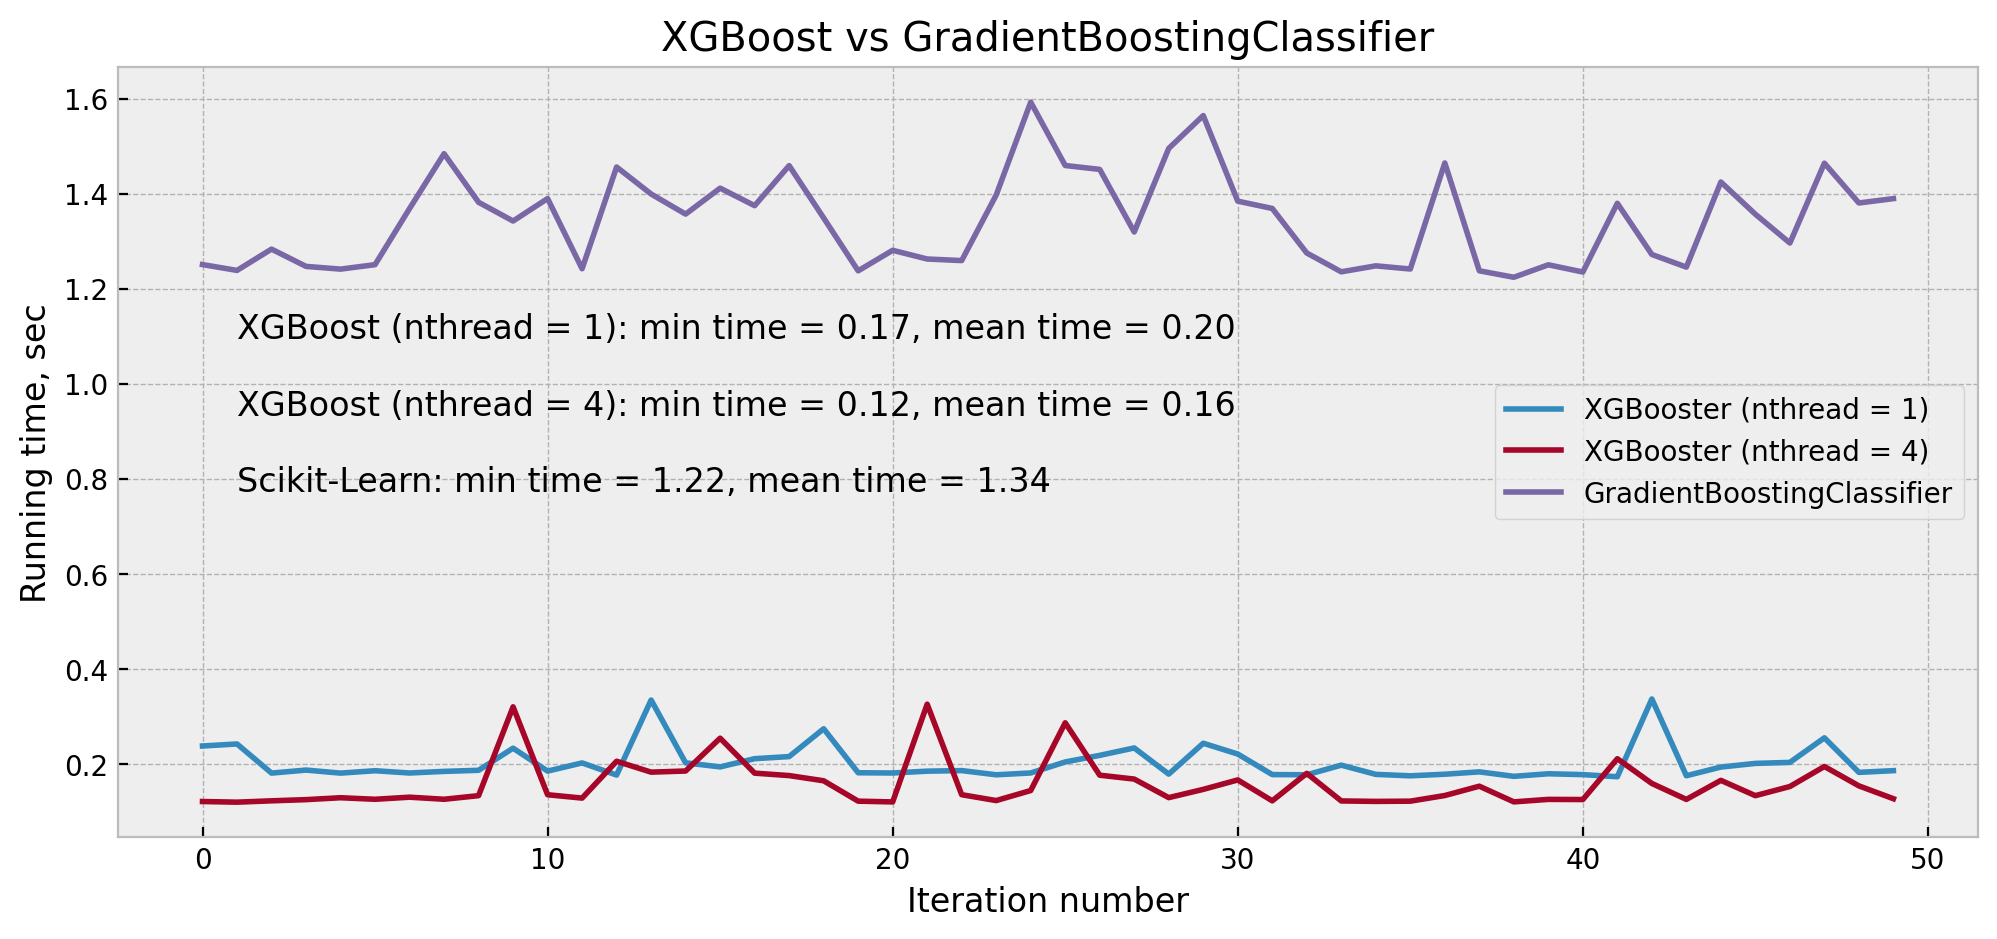

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(xgb_time1, label='XGBooster (nthread = 1)', lw=2)
plt.plot(xgb_time2, label='XGBooster (nthread = 4)', lw=2)
plt.plot(sklearn_time, label='GradientBoostingClassifier', lw=2)
plt.legend(loc='best')
plt.text(1, (xgb_mean1 + sklearn_mean) / 2, 
         'XGBoost (nthread = 1): min time = %.2f, mean time = %.2f' % (xgb_min1, xgb_mean1) +
         '\n\nXGBoost (nthread = 4): min time = %.2f, mean time = %.2f' % (xgb_min2, xgb_mean2)  +
         '\n\nScikit-Learn: min time = %.2f, mean time = %.2f' % (sklearn_min, sklearn_mean), fontsize = 12)
plt.xlabel('Iteration number'); plt.ylabel('Running time, sec')
plt.title('XGBoost vs GradientBoostingClassifier')
plt.show()

Основні переваги XGBoost в порівнянні з sklearn.ensembles.GradientBoostingClassifier:
- Крім дерев можливе використання лінійних моделей в якості базових класифікаторів.
- Швидкість роботи.
- Можливість розпаралелювання.
- Значно більший вибір стандартних функцій втрат, а також можливість задавати свою функцію втрат.
- Наявність регуляризаторів в кінцевій функції втрат і можливість задавати їх коефіцієнти, що дає ще один метод боротьби з перенавчанням, крім використання випадковості (`subsample`, `colsample_bytree`) і основних параметрів дерева рішень.
- Вбудована обробка missing values.

## 9. Корисні ресурси
- <a href="https://en.wikipedia.org/wiki/Boosting_(machine_learning)">Boosting</a>
- [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting)
- <a href="https://github.com/ChenglongChen/Kaggle_CrowdFlower">Огляд</a> розв'язку (на основі XGBoost) переможця змагання Kaggle "CrowdFlower" з передбачення релевантності видачі пошуковика товарів.
- [XGBoost](https://xgboost.readthedocs.org/en/latest/parameter.html)
- [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [Порівняння](https://github.com/szilard/benchm-ml) різних бібліотек для машинного навчання, в тому числі Scikit-Learn і XGBoost.